## SOG stats

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls
import pickle
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
pickle_in1 = open("/home/abhudia/Desktop/Wind speed/3points/winds_sog2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/Wind speed/3points/winds_sog2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/Wind speed/3points/winds_sog2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/Wind speed/3points/winds_sog2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

In [4]:
two = np.append(example1, example2)

In [5]:
three = np.append(two, example3)
full = np.append(three, example4)

In [6]:
wnd_avg = np.array([])
wnd_min = np.array([])
wnd_max = np.array([])
wnd_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    wnd_avg = np.append(wnd_avg, full[start:end].mean())
    wnd_min = np.append(wnd_min, full[start:end].min())
    wnd_max = np.append(wnd_max, full[start:end].max())
    wnd_std = np.append(wnd_std, full[start:end].std())

In [7]:
pickle_in1 = open("/home/abhudia/Desktop/current speed/hourly/mag2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/current speed/hourly/mag2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/current speed/hourly/mag2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/current speed/hourly/mag2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

In [8]:
two = np.append(example1[:,274,242], example2[:,274,242])
three = np.append(two, example3[:,274,242])
fullc = np.append(three, example4[:,274,242])
fullc.shape

(35064,)

In [9]:
cur_avg = np.array([])
cur_min = np.array([])
cur_max = np.array([])
cur_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    cur_avg = np.append(cur_avg, fullc[start:end].mean())
    cur_min = np.append(cur_min, fullc[start:end].min())
    cur_max = np.append(cur_max, fullc[start:end].max())
    cur_std = np.append(cur_std, fullc[start:end].std())

In [10]:
pickle_in1 = open("/home/abhudia/Desktop/salinity/3points/sog2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/salinity/3points/sog2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/salinity/3points/sog2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/salinity/3points/sog2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

two = np.append(example1, example2)
three = np.append(two, example3)
fulls = np.append(three, example4)

In [11]:
sal_avg = np.array([])
sal_min = np.array([])
sal_max = np.array([])
sal_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    sal_avg = np.append(sal_avg, fulls[start:end].mean())
    sal_min = np.append(sal_min, fulls[start:end].min())
    sal_max = np.append(sal_max, fulls[start:end].max())
    sal_std = np.append(sal_std, fulls[start:end].std())

In [12]:
dates = np.array([datetime.date(2015,1,1) + datetime.timedelta(i) for i in range(1450)])
dates.shape

(1450,)

In [48]:
dates2 = np.array([datetime.datetime(2015,1,1,0,30) + datetime.timedelta(hours = i) for i in range(35064)])
month_of_data = np.array([dates2[a].month for a in range(35064)])
monthly_sal_avg = np.array([])
monthly_cur_avg = np.array([])
monthly_wnd_avg = np.array([])
for a in range(1,13):
    monthly_sal_avg = np.append(monthly_sal_avg, fulls[month_of_data==a].mean())
    monthly_cur_avg = np.append(monthly_cur_avg, fullc[month_of_data==a].mean())
    monthly_wnd_avg = np.append(monthly_wnd_avg, full[month_of_data==a].mean())

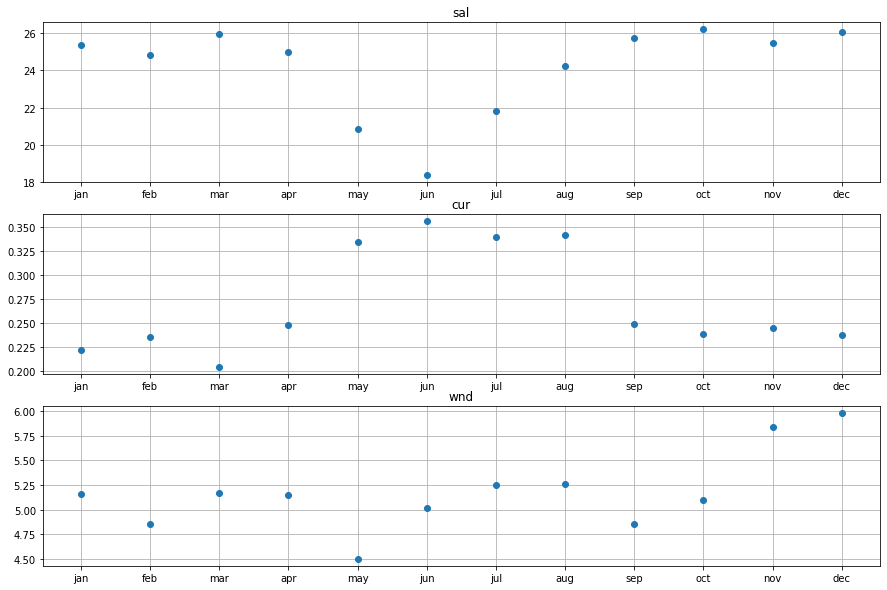

In [49]:
months = np.array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(months, monthly_sal_avg, 'o')
ax[0].set_title('sal')

ax[1].plot(months, monthly_cur_avg, 'o')
ax[1].set_title('cur')

ax[2].plot(months, monthly_wnd_avg, 'o')
ax[2].set_title('wnd');
for ax in ax:
    ax.grid(True);

In [13]:
print("overall mean for salinity = " + str(sal_avg.mean()))
print("overall mean for current = " + str(cur_avg.mean()))
print("overall mean for wind = " + str(wnd_avg.mean()))

overall mean for salinity = 24.151982826364453
overall mean for current = 0.2713025635069814
overall mean for wind = 5.173768248684897


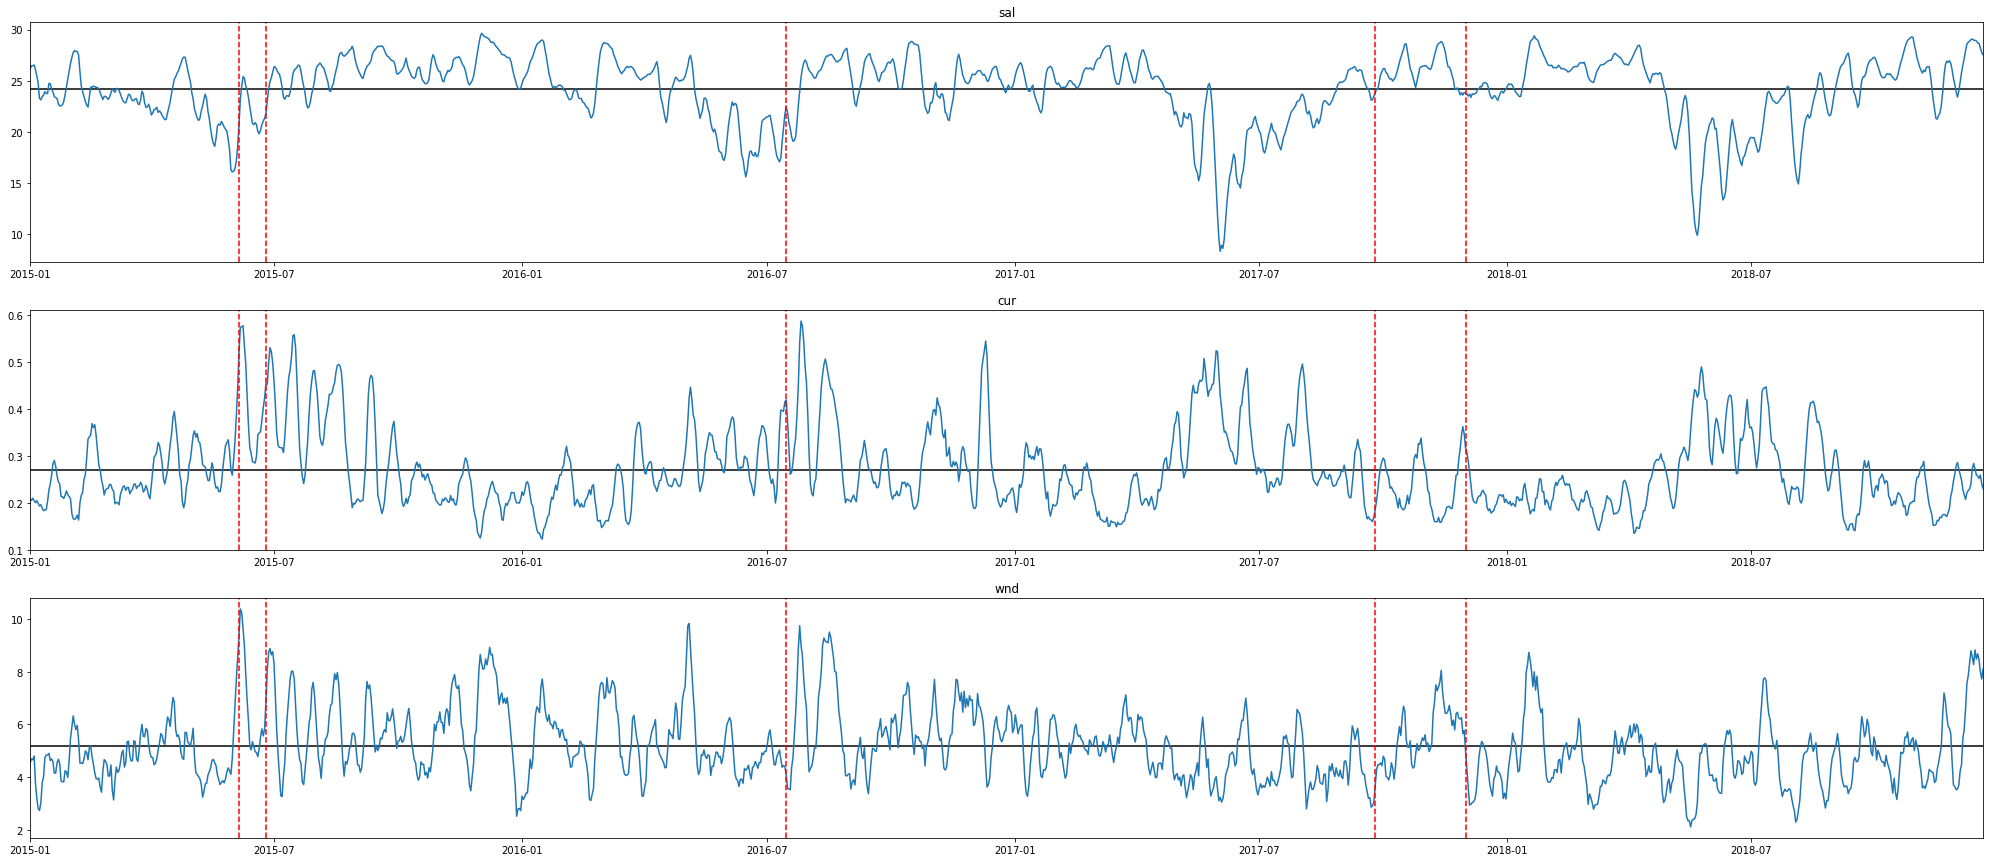

In [14]:
fig, ax = plt.subplots(3,1, figsize = (35,15))
ax[0].plot(dates, sal_avg)
ax[0].set_title('sal')
ax[0].hlines(fulls.mean(), dates[0], dates[-1])

ax[1].plot(dates,cur_avg)
ax[1].hlines(fullc.mean(), dates[0], dates[-1])
ax[1].set_title('cur')

ax[2].plot(dates,wnd_avg)
ax[2].set_title('wnd')
ax[2].hlines(full.mean(), dates[0], dates[-1])
for ax in ax:
    ax.set_xlim(dates[0], dates[-1])
    ax.axvline(datetime.date(2017,12,1), color='r', ls='--')
    ax.axvline(datetime.date(2015,6,5), color='r', ls='--')
    ax.axvline(datetime.date(2016,7,15), color='r', ls='--')
    ax.axvline(datetime.date(2015,6,25), color='r', ls='--')
    ax.axvline(datetime.date(2017,9,25), color='r', ls='--');
#fig.savefig('/home/vdo/Pictures/SOG-choices.png', bbox_inches='tight');

# 2017 freshet with weaker winds and strong current

(60,)


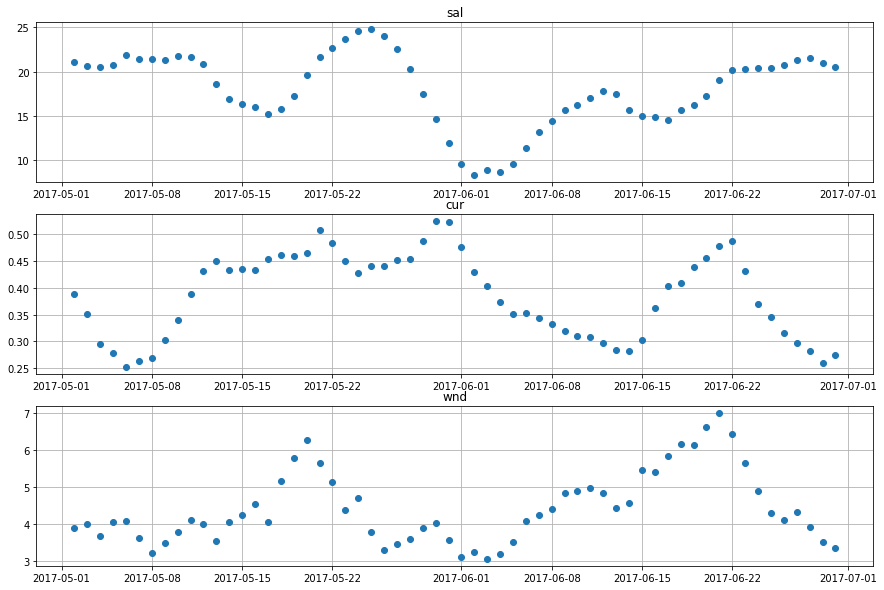

In [47]:
fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(dates[ (dates < datetime.date(2017,7,1)) & (dates > datetime.date(2017,5,1))],
           sal_avg[(dates < datetime.date(2017,7,1)) & (dates > datetime.date(2017,5,1))], 'o')
ax[0].set_title('sal')
ax[1].plot(dates[(dates < datetime.date(2017,7,1)) & (dates > datetime.date(2017,5,1))],
           cur_avg[(dates < datetime.date(2017,7,1)) & (dates > datetime.date(2017,5,1))], 'o')
ax[1].set_title('cur')
ax[2].plot(dates[ (dates < datetime.date(2017,7,1)) & (dates > datetime.date(2017,5,1))],
           wnd_avg[ (dates < datetime.date(2017,7,1)) & (dates > datetime.date(2017,5,1))], 'o')
ax[2].set_title('wnd')
for ax in ax:
    ax.grid('on');
print(wnd_avg[(dates < datetime.date(2017,7,1)) & (dates > datetime.date(2017,5,1))].shape)

### 02jun17 for super low salinity or 01jun17 for stronger currents

## strong a non freshet, strong wind

(29,)


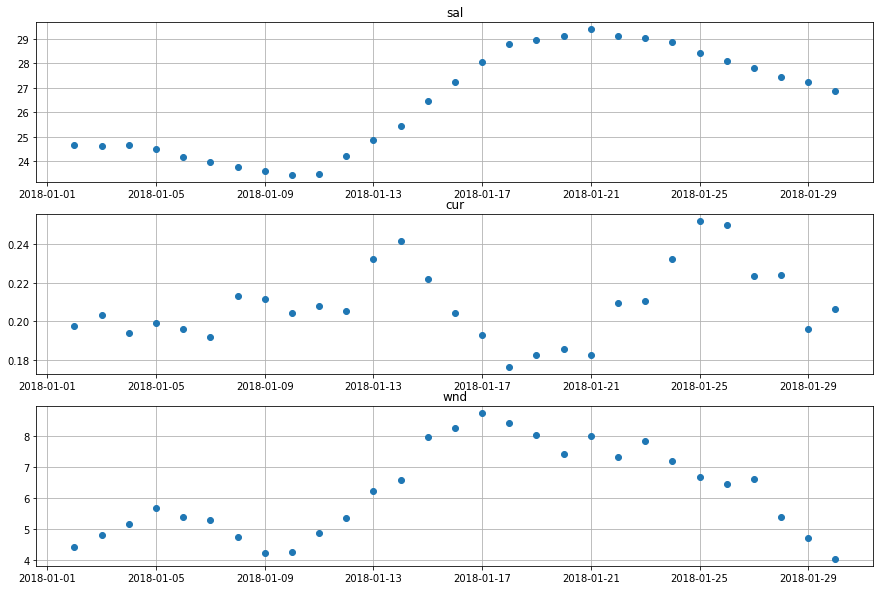

In [40]:
#looking for days with high sal, low wnd, and low cur

fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(dates[(dates < datetime.date(2018,1,31)) & (dates > datetime.date(2018,1,1))],
           sal_avg[(dates < datetime.date(2018,1,31)) & (dates > datetime.date(2018,1,1))], 'o')
ax[0].set_title('sal')
ax[1].plot(dates[(dates < datetime.date(2018,1,31)) & (dates > datetime.date(2018,1,1))],
           cur_avg[(dates < datetime.date(2018,1,31)) & (dates > datetime.date(2018,1,1))], 'o')
ax[1].set_title('cur')
ax[2].plot(dates[(dates < datetime.date(2018,1,31)) & (dates > datetime.date(2018,1,1))],
           wnd_avg[(dates < datetime.date(2018,1,31)) & (dates > datetime.date(2018,1,1))], 'o')
ax[2].set_title('wnd')
for ax in ax:
    ax.grid('on');
print(wnd_avg[(dates < datetime.date(2018,1,31)) & (dates > datetime.date(2018,1,1))].shape)

### We can do the bottom of the hump in salinity but the winds are slightly below average (overall wind mean ~5.2) and current are below average (overall current mean ~0.27). If we do 17jan18, we get strong winds with weaker currents and above average salinity

### Correlation between wind speed and surface current speed

In [35]:
np.corrcoef(full, fullc)

array([[1.        , 0.12110257],
       [0.12110257, 1.        ]])

### Correlation between wind speed and surface salinity

In [36]:
np.corrcoef(full, fulls)

array([[1.        , 0.24459487],
       [0.24459487, 1.        ]])

### Correlation between surface current speed and surface salinity

In [37]:
np.corrcoef(fulls, fullc)

array([[ 1.        , -0.17198908],
       [-0.17198908,  1.        ]])